In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [2]:
file_path = 'mobile_phone_price_prediction.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:
df

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,1365,TCL 40R,4.05,75,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...,Memory Card (Hybrid),12,"18,999",TCL,64 GB inbuilt,15W Fast Charging,720 x 1612 px,Octa Core,Dimensity 700 5G
1366,1366,TCL 50 XL NxtPaper 5G,4.10,80,"Dual Sim, 3G, 4G, VoLTE,",8 GB RAM,5000 mAh Battery,6.8 inches,50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera,Memory Card (Hybrid),14,"24,990",TCL,128 GB inbuilt,33W Fast Charging,1200 x 2400 px,Octa Core,Dimensity 7050
1367,1367,TCL 50 XE NxtPaper 5G,4.00,80,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"23,990",TCL,256 GB inbuilt,18W Fast Charging,720 x 1612 px,Octa Core,Dimensity 6080
1368,1368,TCL 40 NxtPaper 5G,4.50,79,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 1 TB",13,"22,499",TCL,256 GB inbuilt,15W Fast Charging,720 x 1612 px,Octa Core,Dimensity 6020


In [5]:
features = ['Rating','Spec_score','Ram','Battery','No_of_sim','Display','Camera','External_Memory','Inbuilt_memory','Processor','Processor_name']
target = 'Price'
df['Price'] = df['Price'].str.replace(',', '').astype(float)

In [6]:
categorical_features = ['Ram','Battery','No_of_sim','Display','Camera','External_Memory','Inbuilt_memory','Processor','Processor_name']
numerical_features = ['Rating','Spec_score']

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [8]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [9]:
X = df[features]
y = df[target]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Rating', 'Spec_score']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Ram', 'Battery',
                                                   'No_of_sim', 'Display',
                                                   'Camera', 'External_Memory',
                                                   'Inbuilt_memory',
                                                   'Processor',
                                                   'Processor_name'])])),
                ('regressor', LinearRegression())])

In [12]:
y_pred = pipeline.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [14]:
print("Root Mean Squared Error:", rmse)
print("Predicted prices:", y_pred[:5])
print("Actual prices:", y_test[:5])

Root Mean Squared Error: 15734.108920942848
Predicted prices: [36918.23651941 24675.20561358 67925.82879715 38413.13124419
 12063.19141341]
Actual prices: 427     28999.0
1088    30999.0
668     72999.0
572     27990.0
115     11990.0
Name: Price, dtype: float64


In [15]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


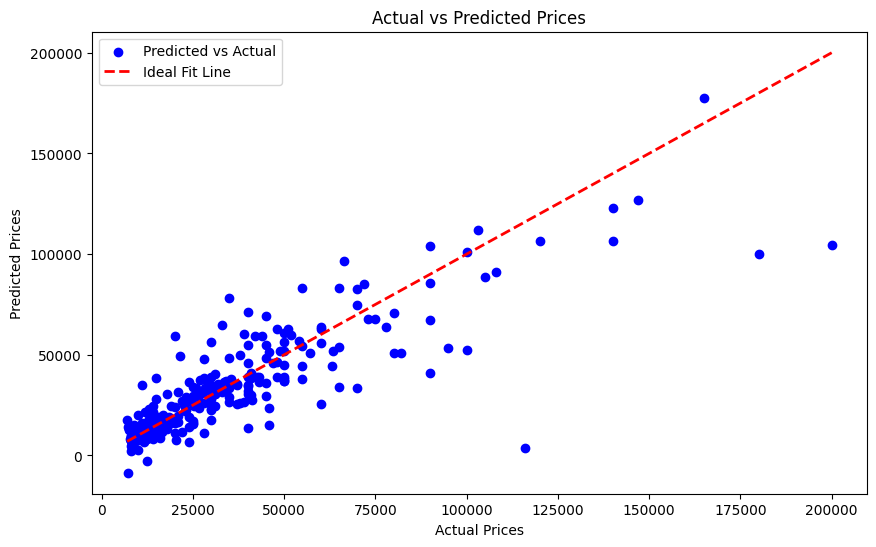

In [16]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Ideal Fit Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()